<a href="https://colab.research.google.com/github/epicskills1/Final_yr_Project/blob/main/Drug_toxicity_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies Import

In [13]:
import numpy as np
import pandas as pd
from scipy import io
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE

Loading and Filteringt Data

In [14]:
import pandas as pd
import numpy as np
from scipy import io
y_tr = pd.read_csv('/content/tox21_labels_train.csv.gz', index_col=0, compression="gzip")
y_te = pd.read_csv('/content/tox21_labels_test.csv.gz', index_col=0, compression="gzip")
x_tr_dense = pd.read_csv('/content/tox21_dense_train.csv.gz', index_col=0, compression="gzip").values
x_te_dense = pd.read_csv('/content/tox21_dense_test.csv.gz', index_col=0, compression="gzip").values
x_tr_sparse = io.mmread('/content/tox21_sparse_train.mtx.gz').tocsc()
x_te_sparse = io.mmread('/content/tox21_sparse_test.mtx.gz').tocsc()

sparse_col_idx = np.asarray((x_tr_sparse > 0).mean(0) > 0.05).ravel()
x_tr = np.hstack([x_tr_dense, x_tr_sparse[:, sparse_col_idx].toarray()])
x_te = np.hstack([x_te_dense, x_te_sparse[:, sparse_col_idx].toarray()])


 Standardize features with tanh scaling

In [15]:
scaler = StandardScaler()
x_tr = np.tanh(scaler.fit_transform(x_tr))
x_te = np.tanh(scaler.transform(x_te))

Shared multi-task model architecture

In [16]:
# Learning rate decay function
def lr_schedule(epoch, lr):
    return lr * 0.95 if epoch > 10 else lr

def create_model(input_dim):
    model = Sequential([
        Dense(256, input_dim=input_dim, kernel_regularizer=l2(1e-5)),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Dropout(0.4),

        Dense(128, kernel_regularizer=l2(1e-5)),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])
    return model

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)



 Training and evaluating the model for each task independently


Training on assay: NR.AhR


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
373/373 - 7s - 18ms/step - AUC: 0.9064 - loss: 0.3960 - val_AUC: 0.9485 - val_loss: 0.2932 - learning_rate: 1.0000e-03
Epoch 2/100
373/373 - 1s - 4ms/step - AUC: 0.9377 - loss: 0.3245 - val_AUC: 0.9600 - val_loss: 0.2625 - learning_rate: 1.0000e-03
Epoch 3/100
373/373 - 1s - 4ms/step - AUC: 0.9497 - loss: 0.2920 - val_AUC: 0.9649 - val_loss: 0.2482 - learning_rate: 1.0000e-03
Epoch 4/100
373/373 - 1s - 3ms/step - AUC: 0.9585 - loss: 0.2668 - val_AUC: 0.9736 - val_loss: 0.2151 - learning_rate: 1.0000e-03
Epoch 5/100
373/373 - 1s - 3ms/step - AUC: 0.9633 - loss: 0.2523 - val_AUC: 0.9729 - val_loss: 0.2168 - learning_rate: 1.0000e-03
Epoch 6/100
373/373 - 1s - 3ms/step - AUC: 0.9687 - loss: 0.2332 - val_AUC: 0.9781 - val_loss: 0.1909 - learning_rate: 1.0000e-03
Epoch 7/100
373/373 - 1s - 3ms/step - AUC: 0.9712 - loss: 0.2246 - val_AUC: 0.9791 - val_loss: 0.1876 - learning_rate: 1.0000e-03
Epoch 8/100
373/373 - 2s - 4ms/step - AUC: 0.9735 - loss: 0.2149 - val_AUC: 0.9798 - val_

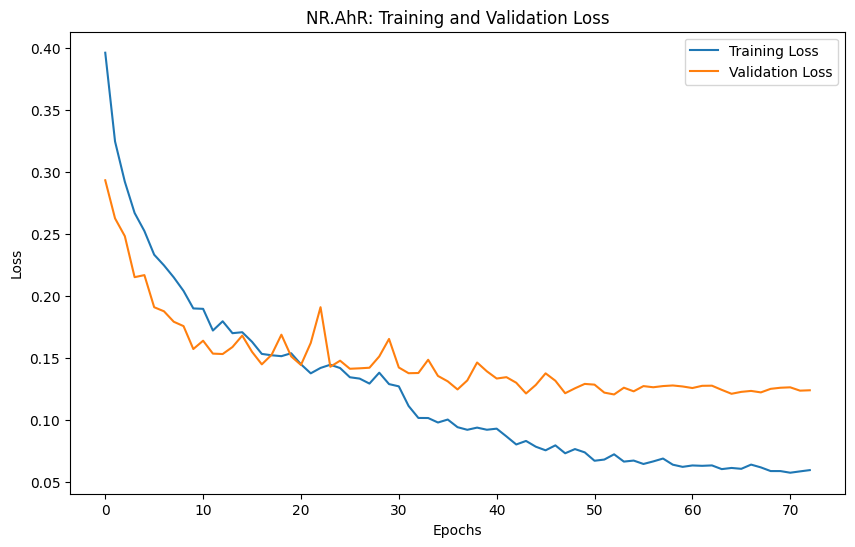

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
NR.AhR: Test AUC = 0.898

Training on assay: NR.AR


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
464/464 - 9s - 20ms/step - AUC: 0.9085 - loss: 0.3833 - val_AUC: 0.9568 - val_loss: 0.2859 - learning_rate: 1.0000e-03
Epoch 2/100
464/464 - 1s - 3ms/step - AUC: 0.9566 - loss: 0.2742 - val_AUC: 0.9809 - val_loss: 0.1917 - learning_rate: 1.0000e-03
Epoch 3/100
464/464 - 1s - 3ms/step - AUC: 0.9737 - loss: 0.2174 - val_AUC: 0.9870 - val_loss: 0.1586 - learning_rate: 1.0000e-03
Epoch 4/100
464/464 - 1s - 3ms/step - AUC: 0.9798 - loss: 0.1917 - val_AUC: 0.9880 - val_loss: 0.1470 - learning_rate: 1.0000e-03
Epoch 5/100
464/464 - 3s - 6ms/step - AUC: 0.9844 - loss: 0.1693 - val_AUC: 0.9877 - val_loss: 0.1481 - learning_rate: 1.0000e-03
Epoch 6/100
464/464 - 3s - 7ms/step - AUC: 0.9875 - loss: 0.1508 - val_AUC: 0.9876 - val_loss: 0.1800 - learning_rate: 1.0000e-03
Epoch 7/100
464/464 - 2s - 4ms/step - AUC: 0.9895 - loss: 0.1401 - val_AUC: 0.9936 - val_loss: 0.1159 - learning_rate: 1.0000e-03
Epoch 8/100
464/464 - 3s - 5ms/step - AUC: 0.9905 - loss: 0.1350 - val_AUC: 0.9926 - val_

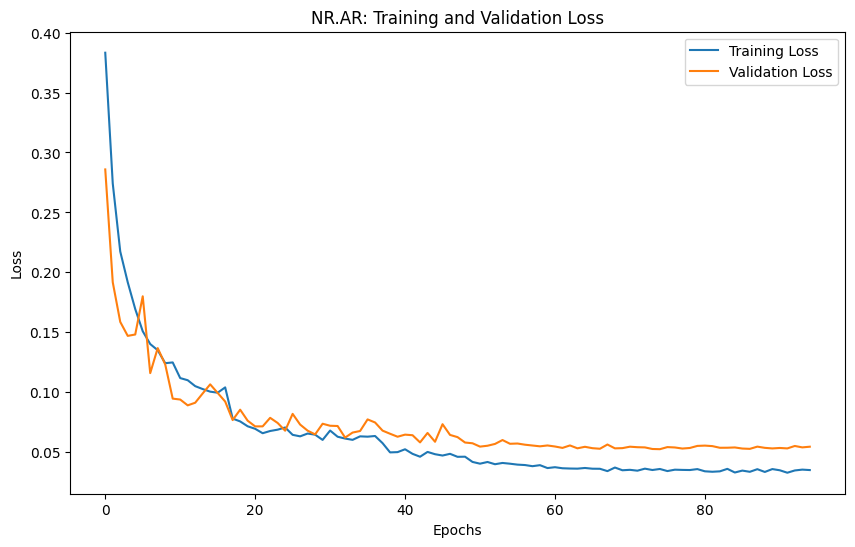

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
NR.AR: Test AUC = 0.767

Training on assay: NR.AR.LBD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
428/428 - 8s - 19ms/step - AUC: 0.9504 - loss: 0.2890 - val_AUC: 0.9879 - val_loss: 0.1539 - learning_rate: 1.0000e-03
Epoch 2/100
428/428 - 6s - 14ms/step - AUC: 0.9805 - loss: 0.1856 - val_AUC: 0.9906 - val_loss: 0.1341 - learning_rate: 1.0000e-03
Epoch 3/100
428/428 - 2s - 5ms/step - AUC: 0.9890 - loss: 0.1398 - val_AUC: 0.9967 - val_loss: 0.0789 - learning_rate: 1.0000e-03
Epoch 4/100
428/428 - 3s - 6ms/step - AUC: 0.9910 - loss: 0.1267 - val_AUC: 0.9967 - val_loss: 0.0867 - learning_rate: 1.0000e-03
Epoch 5/100
428/428 - 3s - 6ms/step - AUC: 0.9926 - loss: 0.1119 - val_AUC: 0.9971 - val_loss: 0.0892 - learning_rate: 1.0000e-03
Epoch 6/100
428/428 - 1s - 3ms/step - AUC: 0.9944 - loss: 0.1013 - val_AUC: 0.9974 - val_loss: 0.0636 - learning_rate: 1.0000e-03
Epoch 7/100
428/428 - 2s - 4ms/step - AUC: 0.9945 - loss: 0.0993 - val_AUC: 0.9969 - val_loss: 0.0672 - learning_rate: 1.0000e-03
Epoch 8/100
428/428 - 2s - 5ms/step - AUC: 0.9961 - loss: 0.0856 - val_AUC: 0.9984 - val

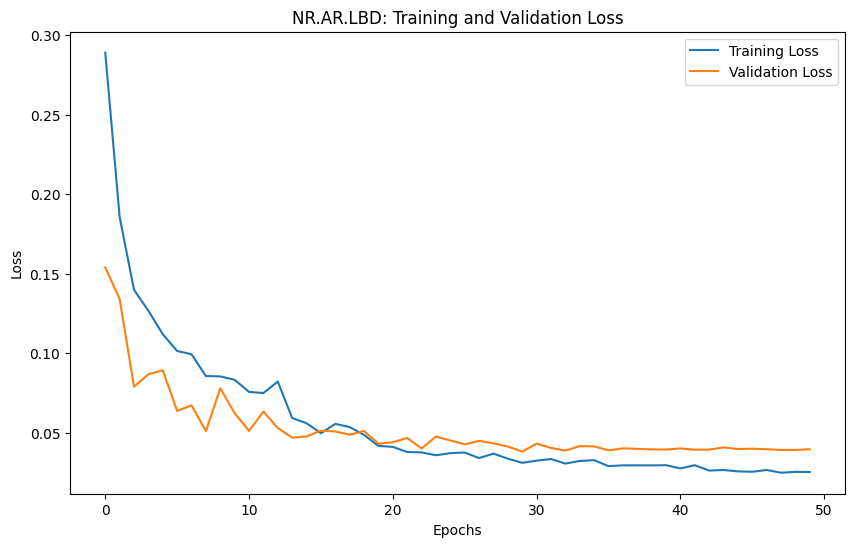

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
NR.AR.LBD: Test AUC = 0.830

Training on assay: NR.Aromatase


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
354/354 - 8s - 22ms/step - AUC: 0.9091 - loss: 0.3916 - val_AUC: 0.9592 - val_loss: 0.2637 - learning_rate: 1.0000e-03
Epoch 2/100
354/354 - 1s - 3ms/step - AUC: 0.9530 - loss: 0.2820 - val_AUC: 0.9754 - val_loss: 0.2075 - learning_rate: 1.0000e-03
Epoch 3/100
354/354 - 1s - 3ms/step - AUC: 0.9686 - loss: 0.2308 - val_AUC: 0.9848 - val_loss: 0.1635 - learning_rate: 1.0000e-03
Epoch 4/100
354/354 - 1s - 3ms/step - AUC: 0.9745 - loss: 0.2074 - val_AUC: 0.9878 - val_loss: 0.1395 - learning_rate: 1.0000e-03
Epoch 5/100
354/354 - 1s - 3ms/step - AUC: 0.9816 - loss: 0.1778 - val_AUC: 0.9908 - val_loss: 0.1347 - learning_rate: 1.0000e-03
Epoch 6/100
354/354 - 1s - 3ms/step - AUC: 0.9855 - loss: 0.1568 - val_AUC: 0.9925 - val_loss: 0.1155 - learning_rate: 1.0000e-03
Epoch 7/100
354/354 - 1s - 3ms/step - AUC: 0.9872 - loss: 0.1481 - val_AUC: 0.9949 - val_loss: 0.1059 - learning_rate: 1.0000e-03
Epoch 8/100
354/354 - 1s - 3ms/step - AUC: 0.9891 - loss: 0.1380 - val_AUC: 0.9942 - val_

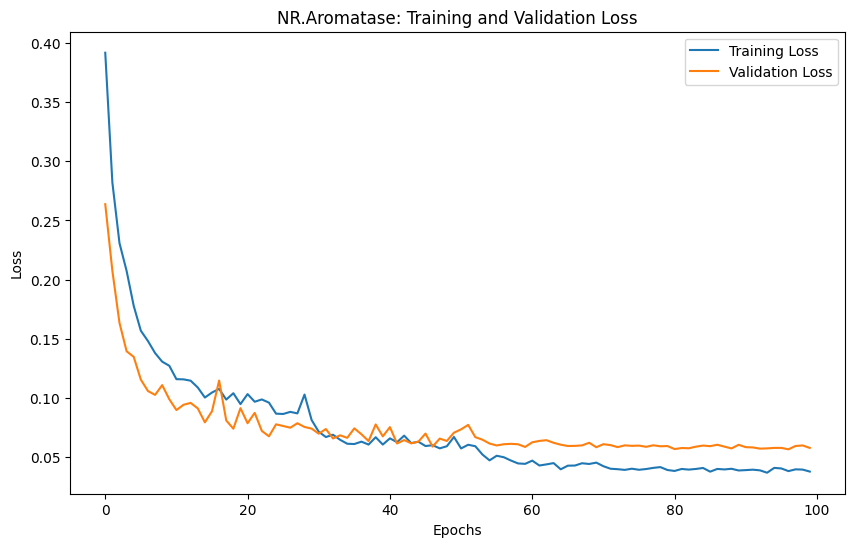

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
NR.Aromatase: Test AUC = 0.732

Training on assay: NR.ER


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
350/350 - 7s - 21ms/step - AUC: 0.7782 - loss: 0.5770 - val_AUC: 0.8314 - val_loss: 0.5145 - learning_rate: 1.0000e-03
Epoch 2/100
350/350 - 6s - 17ms/step - AUC: 0.8359 - loss: 0.5055 - val_AUC: 0.8688 - val_loss: 0.4649 - learning_rate: 1.0000e-03
Epoch 3/100
350/350 - 1s - 3ms/step - AUC: 0.8615 - loss: 0.4696 - val_AUC: 0.8738 - val_loss: 0.4595 - learning_rate: 1.0000e-03
Epoch 4/100
350/350 - 1s - 4ms/step - AUC: 0.8809 - loss: 0.4405 - val_AUC: 0.8887 - val_loss: 0.4352 - learning_rate: 1.0000e-03
Epoch 5/100
350/350 - 1s - 3ms/step - AUC: 0.8945 - loss: 0.4186 - val_AUC: 0.9157 - val_loss: 0.3836 - learning_rate: 1.0000e-03
Epoch 6/100
350/350 - 1s - 4ms/step - AUC: 0.9019 - loss: 0.4057 - val_AUC: 0.9187 - val_loss: 0.3758 - learning_rate: 1.0000e-03
Epoch 7/100
350/350 - 1s - 4ms/step - AUC: 0.9157 - loss: 0.3797 - val_AUC: 0.9213 - val_loss: 0.3741 - learning_rate: 1.0000e-03
Epoch 8/100
350/350 - 1s - 3ms/step - AUC: 0.9217 - loss: 0.3684 - val_AUC: 0.9340 - val

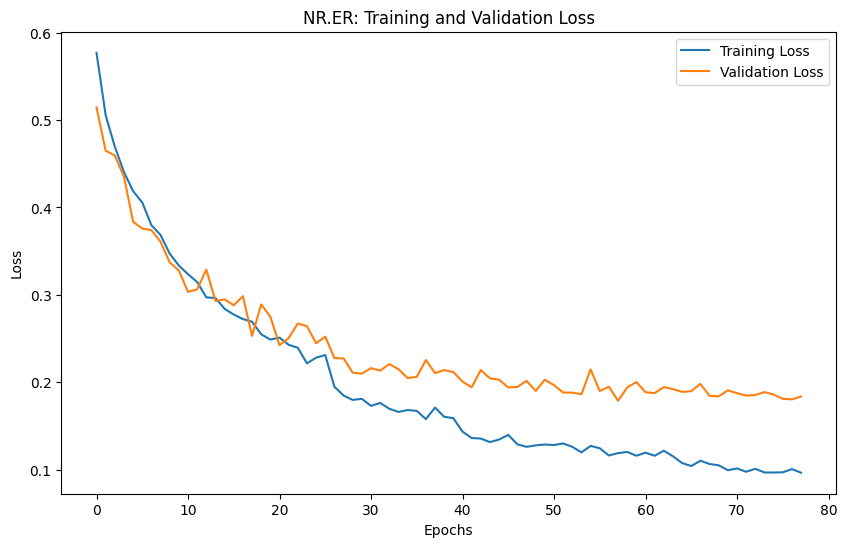

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
NR.ER: Test AUC = 0.736

Training on assay: NR.ER.LBD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
430/430 - 8s - 19ms/step - AUC: 0.9113 - loss: 0.3860 - val_AUC: 0.9580 - val_loss: 0.2912 - learning_rate: 1.0000e-03
Epoch 2/100
430/430 - 5s - 12ms/step - AUC: 0.9540 - loss: 0.2824 - val_AUC: 0.9776 - val_loss: 0.2027 - learning_rate: 1.0000e-03
Epoch 3/100
430/430 - 1s - 3ms/step - AUC: 0.9675 - loss: 0.2385 - val_AUC: 0.9866 - val_loss: 0.1605 - learning_rate: 1.0000e-03
Epoch 4/100
430/430 - 3s - 7ms/step - AUC: 0.9760 - loss: 0.2050 - val_AUC: 0.9887 - val_loss: 0.1454 - learning_rate: 1.0000e-03
Epoch 5/100
430/430 - 1s - 3ms/step - AUC: 0.9802 - loss: 0.1877 - val_AUC: 0.9816 - val_loss: 0.1837 - learning_rate: 1.0000e-03
Epoch 6/100
430/430 - 1s - 3ms/step - AUC: 0.9828 - loss: 0.1761 - val_AUC: 0.9919 - val_loss: 0.1278 - learning_rate: 1.0000e-03
Epoch 7/100
430/430 - 1s - 3ms/step - AUC: 0.9857 - loss: 0.1600 - val_AUC: 0.9914 - val_loss: 0.1339 - learning_rate: 1.0000e-03
Epoch 8/100
430/430 - 1s - 3ms/step - AUC: 0.9877 - loss: 0.1490 - val_AUC: 0.9935 - val

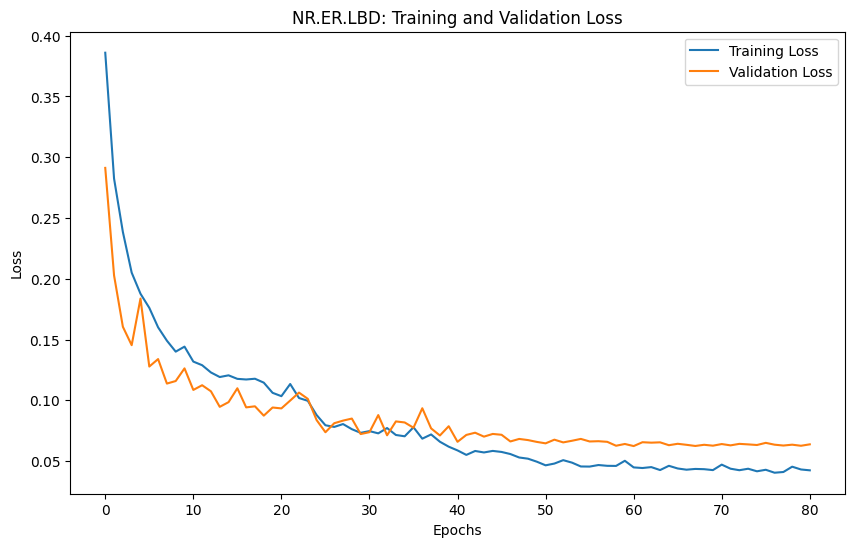

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
NR.ER.LBD: Test AUC = 0.694

Training on assay: NR.PPAR.gamma


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
411/411 - 9s - 21ms/step - AUC: 0.9351 - loss: 0.3309 - val_AUC: 0.9864 - val_loss: 0.1498 - learning_rate: 1.0000e-03
Epoch 2/100
411/411 - 4s - 11ms/step - AUC: 0.9815 - loss: 0.1771 - val_AUC: 0.9945 - val_loss: 0.0992 - learning_rate: 1.0000e-03
Epoch 3/100
411/411 - 2s - 4ms/step - AUC: 0.9878 - loss: 0.1425 - val_AUC: 0.9928 - val_loss: 0.1095 - learning_rate: 1.0000e-03
Epoch 4/100
411/411 - 1s - 4ms/step - AUC: 0.9923 - loss: 0.1115 - val_AUC: 0.9967 - val_loss: 0.0777 - learning_rate: 1.0000e-03
Epoch 5/100
411/411 - 2s - 6ms/step - AUC: 0.9936 - loss: 0.1014 - val_AUC: 0.9978 - val_loss: 0.0653 - learning_rate: 1.0000e-03
Epoch 6/100
411/411 - 1s - 3ms/step - AUC: 0.9941 - loss: 0.0995 - val_AUC: 0.9979 - val_loss: 0.0608 - learning_rate: 1.0000e-03
Epoch 7/100
411/411 - 1s - 3ms/step - AUC: 0.9958 - loss: 0.0854 - val_AUC: 0.9977 - val_loss: 0.0518 - learning_rate: 1.0000e-03
Epoch 8/100
411/411 - 2s - 6ms/step - AUC: 0.9967 - loss: 0.0738 - val_AUC: 0.9982 - val

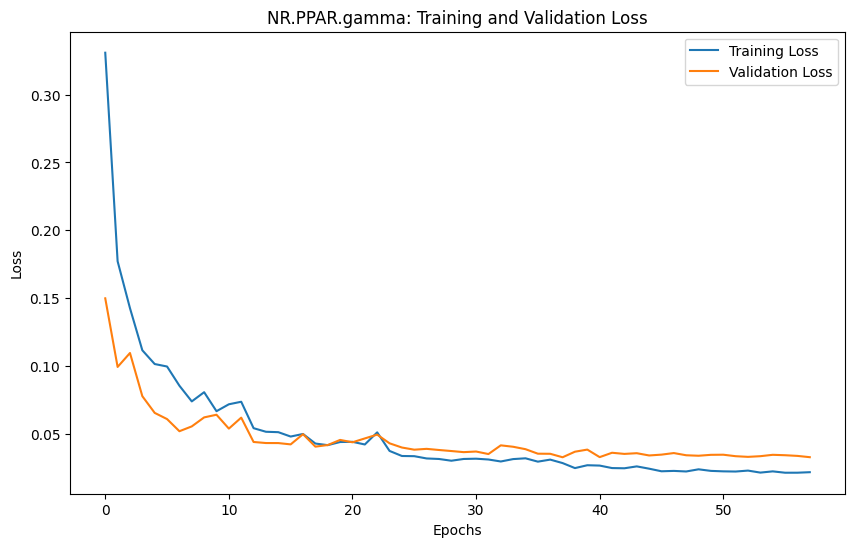

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
NR.PPAR.gamma: Test AUC = 0.842

Training on assay: SR.ARE


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
313/313 - 8s - 26ms/step - AUC: 0.8075 - loss: 0.5496 - val_AUC: 0.8657 - val_loss: 0.4689 - learning_rate: 1.0000e-03
Epoch 2/100
313/313 - 5s - 17ms/step - AUC: 0.8724 - loss: 0.4554 - val_AUC: 0.8936 - val_loss: 0.4227 - learning_rate: 1.0000e-03
Epoch 3/100
313/313 - 1s - 3ms/step - AUC: 0.8918 - loss: 0.4237 - val_AUC: 0.9072 - val_loss: 0.3924 - learning_rate: 1.0000e-03
Epoch 4/100
313/313 - 1s - 3ms/step - AUC: 0.9104 - loss: 0.3870 - val_AUC: 0.9316 - val_loss: 0.3470 - learning_rate: 1.0000e-03
Epoch 5/100
313/313 - 1s - 4ms/step - AUC: 0.9189 - loss: 0.3710 - val_AUC: 0.9307 - val_loss: 0.3461 - learning_rate: 1.0000e-03
Epoch 6/100
313/313 - 1s - 4ms/step - AUC: 0.9286 - loss: 0.3509 - val_AUC: 0.9406 - val_loss: 0.3213 - learning_rate: 1.0000e-03
Epoch 7/100
313/313 - 1s - 3ms/step - AUC: 0.9361 - loss: 0.3323 - val_AUC: 0.9349 - val_loss: 0.3494 - learning_rate: 1.0000e-03
Epoch 8/100
313/313 - 1s - 4ms/step - AUC: 0.9425 - loss: 0.3165 - val_AUC: 0.9468 - val

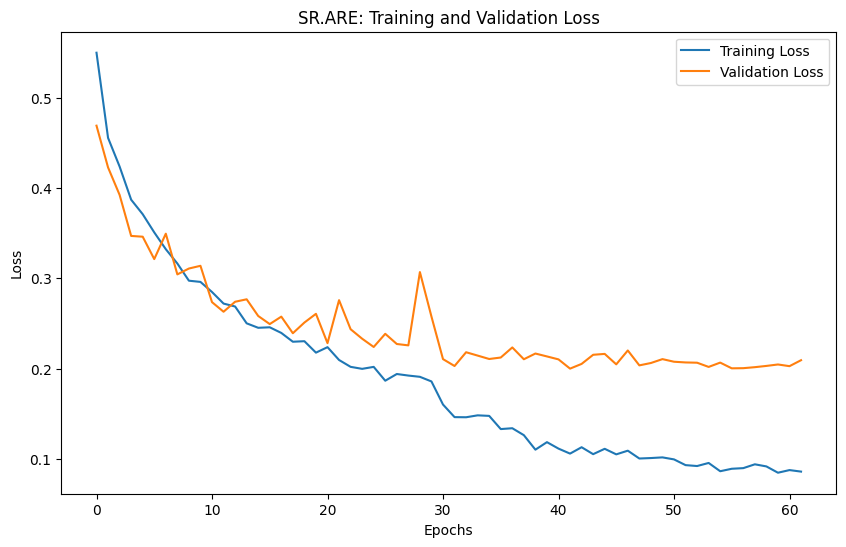

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
SR.ARE: Test AUC = 0.754

Training on assay: SR.ATAD5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
450/450 - 6s - 14ms/step - AUC: 0.9172 - loss: 0.3707 - val_AUC: 0.9775 - val_loss: 0.1984 - learning_rate: 1.0000e-03
Epoch 2/100
450/450 - 1s - 3ms/step - AUC: 0.9704 - loss: 0.2225 - val_AUC: 0.9855 - val_loss: 0.1523 - learning_rate: 1.0000e-03
Epoch 3/100
450/450 - 3s - 6ms/step - AUC: 0.9786 - loss: 0.1852 - val_AUC: 0.9898 - val_loss: 0.1289 - learning_rate: 1.0000e-03
Epoch 4/100
450/450 - 1s - 3ms/step - AUC: 0.9853 - loss: 0.1547 - val_AUC: 0.9865 - val_loss: 0.1496 - learning_rate: 1.0000e-03
Epoch 5/100
450/450 - 1s - 3ms/step - AUC: 0.9890 - loss: 0.1364 - val_AUC: 0.9926 - val_loss: 0.1084 - learning_rate: 1.0000e-03
Epoch 6/100
450/450 - 1s - 3ms/step - AUC: 0.9916 - loss: 0.1175 - val_AUC: 0.9956 - val_loss: 0.0861 - learning_rate: 1.0000e-03
Epoch 7/100
450/450 - 3s - 7ms/step - AUC: 0.9918 - loss: 0.1187 - val_AUC: 0.9932 - val_loss: 0.1156 - learning_rate: 1.0000e-03
Epoch 8/100
450/450 - 2s - 4ms/step - AUC: 0.9927 - loss: 0.1100 - val_AUC: 0.9953 - val_

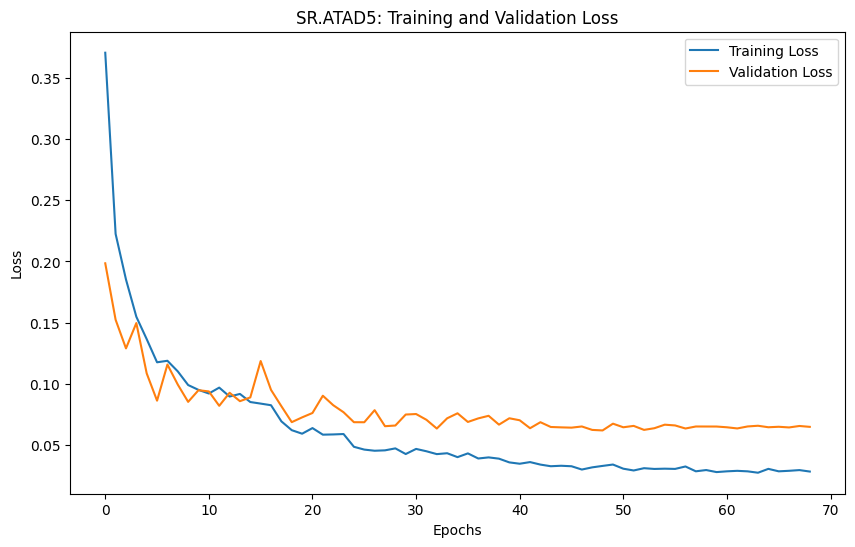

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
SR.ATAD5: Test AUC = 0.766

Training on assay: SR.HSE


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
399/399 - 9s - 22ms/step - AUC: 0.8593 - loss: 0.4791 - val_AUC: 0.9393 - val_loss: 0.3267 - learning_rate: 1.0000e-03
Epoch 2/100
399/399 - 2s - 4ms/step - AUC: 0.9262 - loss: 0.3530 - val_AUC: 0.9691 - val_loss: 0.2443 - learning_rate: 1.0000e-03
Epoch 3/100
399/399 - 2s - 5ms/step - AUC: 0.9509 - loss: 0.2902 - val_AUC: 0.9779 - val_loss: 0.1975 - learning_rate: 1.0000e-03
Epoch 4/100
399/399 - 1s - 3ms/step - AUC: 0.9632 - loss: 0.2514 - val_AUC: 0.9778 - val_loss: 0.1898 - learning_rate: 1.0000e-03
Epoch 5/100
399/399 - 1s - 3ms/step - AUC: 0.9699 - loss: 0.2286 - val_AUC: 0.9815 - val_loss: 0.1893 - learning_rate: 1.0000e-03
Epoch 6/100
399/399 - 3s - 6ms/step - AUC: 0.9753 - loss: 0.2065 - val_AUC: 0.9885 - val_loss: 0.1457 - learning_rate: 1.0000e-03
Epoch 7/100
399/399 - 1s - 3ms/step - AUC: 0.9794 - loss: 0.1903 - val_AUC: 0.9914 - val_loss: 0.1262 - learning_rate: 1.0000e-03
Epoch 8/100
399/399 - 1s - 3ms/step - AUC: 0.9842 - loss: 0.1687 - val_AUC: 0.9903 - val_

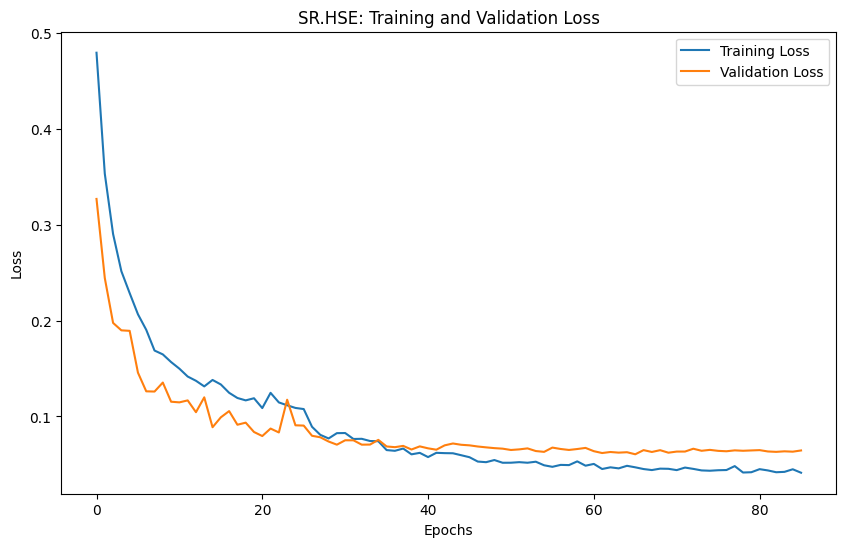

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
SR.HSE: Test AUC = 0.838

Training on assay: SR.MMP


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
319/319 - 8s - 24ms/step - AUC: 0.8886 - loss: 0.4331 - val_AUC: 0.9430 - val_loss: 0.3082 - learning_rate: 1.0000e-03
Epoch 2/100
319/319 - 5s - 16ms/step - AUC: 0.9320 - loss: 0.3400 - val_AUC: 0.9573 - val_loss: 0.2712 - learning_rate: 1.0000e-03
Epoch 3/100
319/319 - 1s - 3ms/step - AUC: 0.9444 - loss: 0.3083 - val_AUC: 0.9526 - val_loss: 0.2903 - learning_rate: 1.0000e-03
Epoch 4/100
319/319 - 1s - 3ms/step - AUC: 0.9536 - loss: 0.2807 - val_AUC: 0.9659 - val_loss: 0.2394 - learning_rate: 1.0000e-03
Epoch 5/100
319/319 - 1s - 3ms/step - AUC: 0.9594 - loss: 0.2645 - val_AUC: 0.9729 - val_loss: 0.2158 - learning_rate: 1.0000e-03
Epoch 6/100
319/319 - 1s - 4ms/step - AUC: 0.9654 - loss: 0.2464 - val_AUC: 0.9702 - val_loss: 0.2236 - learning_rate: 1.0000e-03
Epoch 7/100
319/319 - 2s - 7ms/step - AUC: 0.9699 - loss: 0.2302 - val_AUC: 0.9752 - val_loss: 0.2045 - learning_rate: 1.0000e-03
Epoch 8/100
319/319 - 1s - 4ms/step - AUC: 0.9718 - loss: 0.2224 - val_AUC: 0.9758 - val

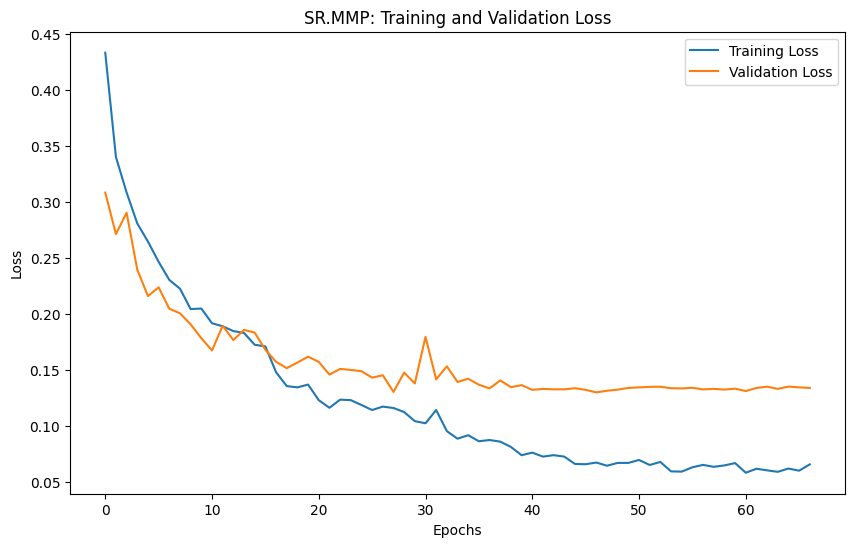

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
SR.MMP: Test AUC = 0.926

Training on assay: SR.p53


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
417/417 - 8s - 20ms/step - AUC: 0.8736 - loss: 0.4539 - val_AUC: 0.9507 - val_loss: 0.2866 - learning_rate: 1.0000e-03
Epoch 2/100
417/417 - 1s - 3ms/step - AUC: 0.9386 - loss: 0.3183 - val_AUC: 0.9700 - val_loss: 0.2432 - learning_rate: 1.0000e-03
Epoch 3/100
417/417 - 1s - 3ms/step - AUC: 0.9576 - loss: 0.2653 - val_AUC: 0.9770 - val_loss: 0.2045 - learning_rate: 1.0000e-03
Epoch 4/100
417/417 - 1s - 3ms/step - AUC: 0.9679 - loss: 0.2336 - val_AUC: 0.9842 - val_loss: 0.1625 - learning_rate: 1.0000e-03
Epoch 5/100
417/417 - 1s - 3ms/step - AUC: 0.9724 - loss: 0.2154 - val_AUC: 0.9852 - val_loss: 0.1535 - learning_rate: 1.0000e-03
Epoch 6/100
417/417 - 1s - 3ms/step - AUC: 0.9794 - loss: 0.1871 - val_AUC: 0.9889 - val_loss: 0.1376 - learning_rate: 1.0000e-03
Epoch 7/100
417/417 - 1s - 3ms/step - AUC: 0.9814 - loss: 0.1794 - val_AUC: 0.9904 - val_loss: 0.1235 - learning_rate: 1.0000e-03
Epoch 8/100
417/417 - 2s - 4ms/step - AUC: 0.9834 - loss: 0.1688 - val_AUC: 0.9913 - val_

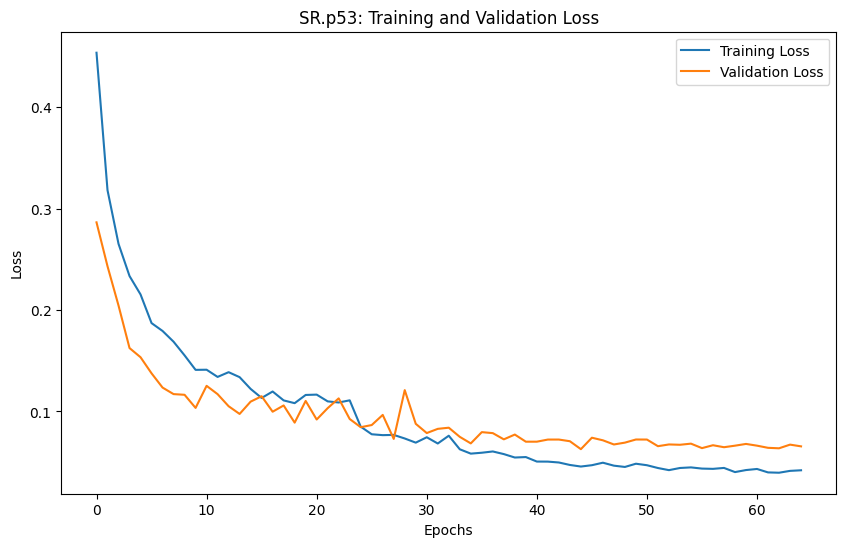

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
SR.p53: Test AUC = 0.825

Average Test AUC: 0.801


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import roc_auc_score

test_auc_scores = []
models = []

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
for target in y_tr.columns:
    print(f"\nTraining on assay: {target}")
    valid_rows = np.isfinite(y_tr[target]).values
    x_target, y_target = x_tr[valid_rows], y_tr[target][valid_rows]
    smote = SMOTE(random_state=42)
    x_balanced, y_balanced = smote.fit_resample(x_target, y_target)
    x_train, x_val, y_train, y_val = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
    model = create_model(input_dim=x_tr.shape[1])
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])
    history = model.fit(
        x_train, y_train, validation_data=(x_val, y_val),
        epochs=100, batch_size=32,
        callbacks=[early_stopping, reduce_lr], verbose=2
    )
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{target}: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    models.append(model)
    valid_test_rows = np.isfinite(y_te[target]).values
    y_test = y_te[target][valid_test_rows].values
    test_predictions = model.predict(x_te[valid_test_rows]).ravel()
    test_auc = roc_auc_score(y_test, test_predictions)
    test_auc_scores.append(test_auc)
    print(f"{target}: Test AUC = {test_auc:.3f}")

avg_test_auc = np.mean(test_auc_scores)
print(f"\nAverage Test AUC: {avg_test_auc:.3f}")


In [19]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 40.7 MB/s eta 0:00:00


Sample Output

In [ ]:
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

def compute_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")
    dense_features = np.array([
        Descriptors.MolWt(mol),
        Descriptors.MolLogP(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.NumHDonors(mol),
    ])
    sparse_features = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    sparse_features_array = np.zeros((2048,), dtype=int)
    DataStructs.ConvertToNumpyArray(sparse_features, sparse_features_array)
    return dense_features, sparse_features_array

sample_smiles = "CCO"

dense_features, sparse_features = compute_features(sample_smiles)

sparse_features_selected = sparse_features[sparse_col_idx]

sample_features = np.hstack([dense_features, sparse_features_selected]).reshape(1, -1)

for assay_name, model in zip(assay_names, models):
    prediction = model.predict(sample_features).ravel()[0]
    print(f"{assay_name}: Predicted toxicity probability = {prediction:.3f}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found